# Final Project: Analyzing Airbnb Properties in Europe

<i>
Luis Otero
<br>
BSAN 6030
<br>
December 15, 2023
</i>
<br> <br>
<img src = "https://cdn.freebiesupply.com/logos/large/2x/airbnb-2-logo-png-transparent.png" alt = "image" width = 100 height = "auto">

# Table of Contents
* [Introduction](#intro)
    * [Background](#background)
    * [Datasets](#datasets)
* [Loading the Data](#load_data)
    * [Importing and Combining All the Data](#import_data)
    * [Data Overview](#data_overview)
* [Data Cleaning and Manipulation](#clean_data)
    * [Editing Columns](#edit_columns)
    * [Handling Outliers](#outliers)
    * [Creating Bins](#bins)
* [Data Aggregation and Summary Statistics](#data_agg)
    * [Looking at Cities](#cities_agg)
* [Data Visualizations](#data_viz)

## Introduction <a class="anchor" id="intro"></a>

### Background <a class="anchor" id="background"></a>

Airbnb is an American-based company operating an online marketplace listing properties that can be potentially rented out by people who are looking for short-term or long-term lodgings. Nowadays, travelers opt for Airbnb instead of the usual motel or hotel room booking as they find the homier and cheaper homestays more appealing. The hospitality service offers hosts a relatively easy way to earn extra income by advertising then renting out a room or their entire property to millions of people worldwide. In 2011, the company expanded to Europe, marking a huge milestone for both the enterprise and travellers but also giving hosts in Europe the opportunity to make additional earnings on the side. Today, more and more people are looking at the possibility of opening an Airbnb property listing but normally, they face the issue of what factors determine a reasonable price of renting out their listing. A host would also need to keep in mind of the cities and factors that would make a guest more content with the rental. Ultimately, an indivual needs to proceed with caution and explore all socioeconomic attributes when making a huge investment such as a property listing in the hospitality industry.

### Business Questions:
- What are the determinants of Airbnb prices across these cities?
- In which cities are travellers booking the most Airbnbs?
- What types of Airbnbs are the most popular?
- Which factors influence a guest's overall satisfaction with a listing?

### Datasets <a class="anchor" id="datasets"></a>

To help answer these questions, I downloaded a compilation of datasets from Kaggle with each dataset containing Airbnb property listing data within a specific city in Europe. The 20 datasets contain information on a variety of property characteristics such as the price of the Airbnb listing, the room type, whether its a private or shared homestay, and the maximum number of people can stay in the room. There are ten cities total with two datasets for each city, one for weekday prices of Airbnb listings and one for weekend prices of Airbnb listings.
<br><br>
Link to dataset: [Airbnb Prices in European Cities](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data)
<br><br>
Dataset Columns:
<br>
| **Column Name** | **Description** | **Type of Variable** |
| --------------- | --------------- | -------------------- |
| realSum | Total Price of Airbnb listing for two people and two nights in euros | Numeric |
| room_type | The type of room being offered (e.g. private, shared, etc.) | Categorical |
| room_shared | Whether the room is shared or not | Boolean |
| room_private | Whether the room is private or not | Boolean |
| person_capacity | The maximum number of people that can stay in the room | Numeric |
| host_is_superhost | Whether the host is a superhost or not | Boolean |
| multi | If the listing belongs to hosts with 2-4 listings | Numeric |
| biz | If the listing belongs to hosts with more than 4 listings | Numeric |
| cleanliness_rating | The cleanliness rating of the listing | Numeric |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | Numeric |
| bedrooms | The number of bedrooms in the listing (0 for studios) | Numeric |
| dist | The distance to the city center in km | Numeric |
| metro_dist | The distance to the nearest metro station in km | Numeric |
| attr_index | Attraction index of the listing location | Numeric |
| attr_index_norm | Normalised attraction index (0-100) | Numeric |
| rest_index | Restaurant index of the listing location | Numeric |
| rest_index_norm | Normalised restaurant index (0-100) | Numeric |
| lng | The longitude of the listing | Numeric |
| lat | The latitude of the listing | Numeric |

For this project, I will be utilizing Python and Jupyter Notebooks to explore these datasets.

## Loading the Data <a class="anchor" id="load_data"></a>

The first step is to import all the datasets and combine them into one. This will make the data analysis easier and more efficient as I will not need to perform functions and operations on each of the twenty datasets.

In [33]:
#import libraries

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

### Importing and Combining All the Data <a class="anchor" id="import_data"></a>

In [2]:
#using glob to get all csv

cwd = os.getcwd() # use os to store current working directory in variable
csv_files = glob.glob(os.path.join(cwd, "*.csv")) #use glob to get all csv file paths

#create empty list to store all file content and empty pandas DataFrame to store
master_data = []

#use for loop to go through each csv file path
for file_path in csv_files:
    if file_path.endswith('.csv') and 'airbnb_master_data' not in file_path:

        city = file_path.split('_')[0].split('/')[-1] #slicing file path to get city in file name
        week = file_path.split('_')[-1].strip('.csv') #slicing file path to get either weekday or weekend

        file_data = pd.read_csv(file_path) #read csv file

        #add new columns to dataset
        file_data['city'] = city
        file_data['part_of_week'] = week

        #add dataset to list
        master_data.append(file_data)

#concatenating all datasets into one and saving it
airbnb_data = pd.concat(master_data)
airbnb_data.to_csv('airbnb_master_data.csv')

### Data Overview <a class="anchor" id="data_overview"></a>

Now that the data is loaded, I will perform a quick overview of the dataset.

In [3]:
#number of rows and columns in dataset
airbnb_data.shape

(51707, 22)

In [4]:
#look at first five rows of dataset
airbnb_data.head()

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380   78.690379         4.166708   98.253896   
1  0.488389    0.239404  631.176378        33.421209  837.280757   
2  5.748312    3.651621   75.275877         3.985908   95.386955   
3  0.384862    0.439876  493.272534        26.119108  875.033098   
4  0.544738    0.318693  552.830324        29.272733  815.305740   

   rest_index_norm      lng       lat       city  part_of_week  
0         6.846473  4.90569  52.41772  amsterdam       weekday  
1        58.342928  4.90005  52.37432  amsterdam       weekday  
2         6.646700  4.97512  52.36103  amsterdam       weekday  
3        60.973565  4.89417  52.37663  amsterdam       weekday  
4        56.811677  4.90051  52.37508  amsterdam       weekday  

[5 rows x 22 columns]

In [5]:
#dataset columns with their data types
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 5378
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  5170

In [6]:
# descriptive statistics
round(airbnb_data.describe(),2)

Unnamed: 0   realSum  person_capacity     multi       biz  \
count    51707.00  51707.00         51707.00  51707.00  51707.00   
mean      1620.50    279.88             3.16      0.29      0.35   
std       1217.38    327.95             1.30      0.45      0.48   
min          0.00     34.78             2.00      0.00      0.00   
25%        646.00    148.75             2.00      0.00      0.00   
50%       1334.00    211.34             3.00      0.00      0.00   
75%       2382.00    319.69             4.00      1.00      1.00   
max       5378.00  18545.45             6.00      1.00      1.00   

       cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
count            51707.00                    51707.00  51707.00  51707.00   
mean                 9.39                       92.63      1.16      3.19   
std                  0.95                        8.95      0.63      2.39   
min                  2.00                       20.00      0.00      0.02   
25%                  9.00                       90.00      1.00      1.45   
50%                 10.00                       95.00      1.00      2.61   
75%                 10.00                       99.00      1.00      4.26   
max                 10.00                      100.00     10.00     25.28   

       metro_dist  attr_index  attr_index_norm  rest_index  rest_index_norm  \
count    51707.00    51707.00         51707.00    51707.00         51707.00   
mean         0.68      294.20            13.42      626.86            22.79   
std          0.86      224.75             9.81      497.92            17.80   
min          0.00       15.15             0.93       19.58             0.59   
25%          0.25      136.80             6.38      250.85             8.75   
50%          0.41      234.33            11.47      522.05            17.54   
75%          0.74      385.76            17.42      832.63            32.96   
max         14.27     4513.56           100.00     6696.16           100.00   

            lng       lat  
count  51707.00  51707.00  
mean       7.43     45.67  
std        9.80      5.25  
min       -9.23     37.95  
25%       -0.07     41.40  
50%        4.87     47.51  
75%       13.52     51.47  
max       23.79     52.64

The dataset contains 51707 rows and 22 columns with no missing values in the dataset. There are a couple of columns in which we clearly see that there are outliers present in the data, so I will need to address them before moving on with my analysis. For example, we can see that the max in realSum is 18545 euros while the average is approximately €288.

**attr_index_norm** and **rest_index_norm** are calculated columns created by the authors of the datasets. **attr_index_norm** measures the proximity of the number of popular tourist attractions near the Airbnb listing while **rest_index_norm** is measured for restaurants, and they are based on TripAdvisor data. The authors measured popularity by looking at all the tourist attractions in the destination city and factoring in the number of reviews, the review ratings and the distance between the Airbnb and the venue. The numerical columns are on a scale of 0 to 100. For instance, an Airbnb listing with a higher attraction and restaurant index means that the property is located near popular tourist attractions (based on number of positive reviews) and is near very popular restaurants.

Additionally, there are a couple of attirbutes that would need to be removed including Unnamed, attr_index, and rest_index. There are a couple of columns that are supposed be boolean but are integers instead, I will need to convert them.

## Data Cleaning and Manipulation <a class="anchor" id="clean_data"></a>

### Editing Columns <a class="anchor" id="edit_columns"></a>

In [7]:
#dropping irrelevant columns
airbnb_data = airbnb_data.drop(columns = ['Unnamed: 0', 'attr_index', 'rest_index'])
airbnb_data.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat',
       'city', 'part_of_week'],
      dtype='object')

In [8]:
#converting boolean columns to int
columns_to_convert = ['room_shared', 'room_private', 'host_is_superhost']

airbnb_data[columns_to_convert] = airbnb_data[columns_to_convert].replace({True: 1, False: 0})

airbnb_data.dtypes

realSum                       float64
room_type                      object
room_shared                     int64
room_private                    int64
person_capacity               float64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
part_of_week                   object
dtype: object

In [9]:
#renaming columns for legibility
rename_dict = {'realSum': 'price', 'multi': '2_to_4_listings', 'biz': 'more_than_6_listings',}

#rename dataframe columns, sorting dataframe by city and part_of_week, dropping duplicates
airbnb_data = airbnb_data.rename(columns = rename_dict).sort_values(by = ['city', 'part_of_week'])
airbnb_data = airbnb_data.drop_duplicates(ignore_index=True)

airbnb_data

price        room_type  room_shared  room_private  \
0      194.033698     Private room            0             1   
1      344.245776     Private room            0             1   
2      264.101422     Private room            0             1   
3      433.529398     Private room            0             1   
4      485.552926     Private room            0             1   
...           ...              ...          ...           ...   
51702  715.938574  Entire home/apt            0             0   
51703  304.793960  Entire home/apt            0             0   
51704  637.168969  Entire home/apt            0             0   
51705  301.054157     Private room            0             1   
51706  133.230489     Private room            0             1   

       person_capacity  host_is_superhost  2_to_4_listings  \
0                  2.0                  0                1   
1                  4.0                  0                0   
2                  2.0                  0                0   
3                  4.0                  0                0   
4                  2.0                  1                0   
...                ...                ...              ...   
51702              6.0                  0                0   
51703              2.0                  0                0   
51704              2.0                  0                0   
51705              2.0                  0                0   
51706              4.0                  1                1   

       more_than_6_listings  cleanliness_rating  guest_satisfaction_overall  \
0                         0                10.0                        93.0   
1                         0                 8.0                        85.0   
2                         1                 9.0                        87.0   
3                         1                 9.0                        90.0   
4                         0                10.0                        98.0   
...                     ...                 ...                         ...   
51702                     1                10.0                       100.0   
51703                     0                 8.0                        86.0   
51704                     0                10.0                        93.0   
51705                     0                10.0                        87.0   
51706                     0                10.0                        93.0   

       bedrooms      dist  metro_dist  attr_index_norm  rest_index_norm  \
0             1  5.022964    2.539380         4.166708         6.846473   
1             1  0.488389    0.239404        33.421209        58.342928   
2             1  5.748312    3.651621         3.985908         6.646700   
3             2  0.384862    0.439876        26.119108        60.973565   
4             1  0.544738    0.318693        29.272733        56.811677   
...         ...       ...         ...              ...              ...   
51702         3  0.530181    0.135447        15.712158        10.604584   
51703         1  0.810205    0.100839        14.678608         8.270427   
51704         1  0.994051    0.202539        12.107921         6.822996   
51705         1  3.044100    0.287435         7.822803         3.832416   
51706         1  1.263932    0.480903        10.774264         5.444140   

            lng       lat       city part_of_week  
0       4.90569  52.41772  amsterdam      weekday  
1       4.90005  52.37432  amsterdam      weekday  
2       4.97512  52.36103  amsterdam      weekday  
3       4.89417  52.37663  amsterdam      weekday  
4       4.90051  52.37508  amsterdam      weekday  
...         ...       ...        ...          ...  
51702  16.37940  48.21136     vienna      weekend  
51703  16.38070  48.20296     vienna      weekend  
51704  16.38568  48.20460     vienna      weekend  
51705  16.34100  48.19200     vienna      weekend  
51706  16.39066  48.20811     vienna      weekend  

[51707 rows

I first dropped unnecessary columns inlucding Unnamed:0, attr_index, and rest_index. Then I renamed certain columns in the dataframe so the values within the columns can be clearer:

| **Original Column Name** | **New Name** |
| --------------- | --------------- |
| realSum | price |
| multi | 2_to_4 listings |
| biz | more_than_6_listings |

I then sorted the entire dataframe by the city and part_of_week columns in ascending order. I made sure to remove any duplicate rows in the data but it appears that there were none since the row count did not change. I will now shift my attention to dealing with the outliers.

### Handling Outliers <a class="anchor" id="outliers"></a>

<AxesSubplot:ylabel='Frequency'>

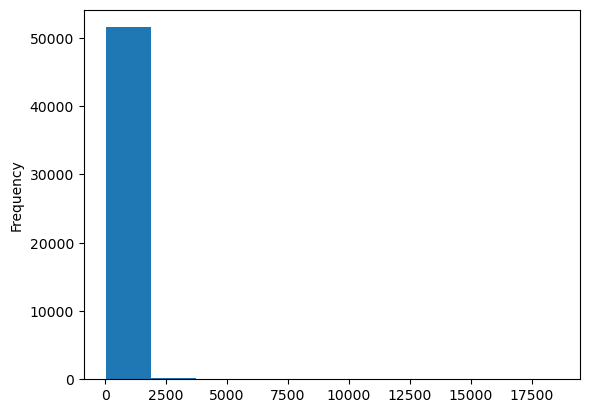

In [10]:
#create histogram
airbnb_data['price'].plot.hist()

In [11]:
#box plot
px.box(airbnb_data, x = 'city', y = 'price', color = 'city', points = 'outliers')

In [12]:
#dropping outliers
airbnb_data_cleaned = airbnb_data[airbnb_data['price'] <= 3000]

airbnb_data_cleaned.shape

(51654, 19)

<AxesSubplot:ylabel='Frequency'>

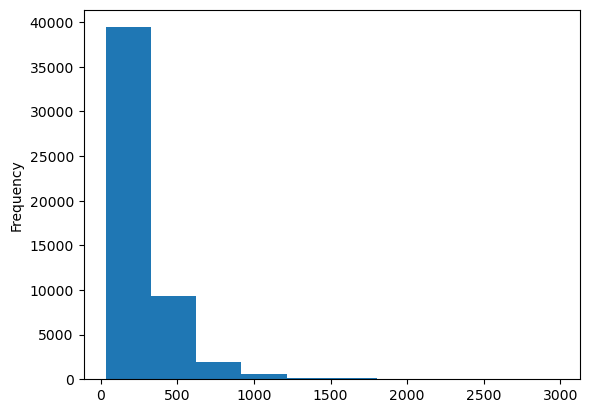

In [13]:
#new histogram
airbnb_data_cleaned['price'].plot.hist()

In [14]:
#new box plot
px.box(airbnb_data_cleaned, x = 'city', y = 'price', color = 'city', points = 'outliers')

To understand how much of an impact the outliers have on the data, I first created a basic histogram and then a box and whisker plot, visualizing the outliers. It appears that the data is severely right-skewed. Each city has their own defined interquartile range, medians and upper fences, which indicates that each city in the data have differing number of Airbnb listings or rows. It appeared that a good amount of prices that are greater than 3000 euros was a good benchmark to filter out. From there, I excluded the records that listed prices larger than €3000 and kept the ones under or equal to €3000. This brought my row count from 51707 to 51654, definitely not much of a difference!

### Creating Bins <a class="anchor" id="bins"></a>

In [15]:
#creating bins
bins = [30, 100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000]
labels = ["30 to 100", "100 to 250", "250 to 500", "500 to 750", "750 to 1000", "1000 to 1500", "1500 to 2000", "2000 to 2500", ">2500"]

#creating bins column
airbnb_data_cleaned['price_range'] = pd.cut(airbnb_data_cleaned.price, bins=bins, labels=labels)

#display the counts for each price range
airbnb_data_cleaned['price_range'].value_counts()

/var/folders/1l/tdn0y83s4tg7r1s7ymj8phd40000gn/T/ipykernel_84528/3378812678.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



100 to 250      28620
250 to 500      14809
500 to 750       3349
30 to 100        3092
750 to 1000      1066
1000 to 1500      513
1500 to 2000      122
2000 to 2500       58
>2500              25
Name: price_range, dtype: int64

In [16]:
#creating bins
clean_bins = [0, 6, 8, 9, 10]
clean_labels = ["<6", "6 to 8", "9", "10"]

#creating bins column
airbnb_data_cleaned['clean_category'] = pd.cut(airbnb_data_cleaned.cleanliness_rating, bins=clean_bins, labels=clean_labels)

#display the counts for each clean range
airbnb_data_cleaned['clean_category'].value_counts()

/var/folders/1l/tdn0y83s4tg7r1s7ymj8phd40000gn/T/ipykernel_84528/4157303539.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10        30035
9         15442
6 to 8     5294
<6          883
Name: clean_category, dtype: int64

In [17]:
#creating bins
guest_bins = [0, 50, 60, 70, 80, 90, 100]
guest_labels = ["<50", "50 to 60", "60 to 70", "70 to 80", "80 to 90","90 to 100"]

#creating bins column
airbnb_data_cleaned['guest_satisfaction_range'] = pd.cut(airbnb_data_cleaned.guest_satisfaction_overall, bins=guest_bins, labels=guest_labels)

#display the counts for each clean range
airbnb_data_cleaned['guest_satisfaction_range'].value_counts()

/var/folders/1l/tdn0y83s4tg7r1s7ymj8phd40000gn/T/ipykernel_84528/1417238883.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



90 to 100    37097
80 to 90      9892
70 to 80      3301
60 to 70       511
50 to 60       504
<50            349
Name: guest_satisfaction_range, dtype: int64

In [18]:
#see new data
airbnb_data_cleaned.sample(10)

price        room_type  room_shared  room_private  \
45117  246.650925  Entire home/apt            0             0   
865    713.800295  Entire home/apt            0             0   
12533  231.840703  Entire home/apt            0             0   
27635  158.282180     Private room            0             1   
29213  449.681319  Entire home/apt            0             0   

       person_capacity  host_is_superhost  2_to_4_listings  \
45117              4.0                  0                0   
865                4.0                  0                0   
12533              4.0                  0                0   
27635              5.0                  0                0   
29213              2.0                  0                0   

       more_than_6_listings  cleanliness_rating  guest_satisfaction_overall  \
45117                     1                 9.0                        93.0   
865                       1                10.0                       100.0   
12533                     0                10.0                        91.0   
27635                     1                 9.0                        83.0   
29213                     1                10.0                       100.0   

       ...  metro_dist  attr_index_norm  rest_index_norm       lng       lat  \
45117  ...    1.500793        17.389631        51.038181  12.47000  41.89700   
865    ...    0.496221        19.004874        30.236974   4.90778  52.37357   
12533  ...    0.550200        12.866082        24.750272  13.41385  52.55439   
27635  ...    0.978961        11.408005         5.872228  -0.00781  51.49540   
29213  ...    0.180326        50.504099        24.701968  -0.11752  51.51721   

            city  part_of_week price_range clean_category  \
45117       rome       weekend  100 to 250              9   
865    amsterdam       weekday  500 to 750             10   
12533     berlin       weekend  100 to 250             10   
27635     london       weekend  100 to 250              9   
29213     london       weekend  250 to 500             10   

      guest_satisfaction_range  
45117                90 to 100  
865                  90 to 100  
12533                90 to 100  
27635                 80 to 90  
29213                90 to 100  

[5 rows x 22 columns]

I created new columns in the dataframe called **price_range**, which categorizes each Airbnb price into a range so that I can create simpler data visualizations later on. Additionally, this would give me a better idea of what price range to potential new hosts. I applied the same process to cleanliness_rating and guest_satisfaction_overall.

## Data Aggregation and Summary Statistics <a class="anchor" id="data_agg"></a>

### Looking at Cities <a class="anchor" id="cities_agg"></a>

In [73]:
#aggregation of number of airbnbs in cities
counts=airbnb_data_cleaned.groupby('city').price.count().reset_index().rename(columns={'price':'Count'})
counts=counts.sort_values(by=['Count'],ascending=False)
counts

city  Count
6     london   9972
8       rome   9027
7      paris   6677
5     lisbon   5763
1     athens   5279
4   budapest   4020
9     vienna   3534
2  barcelona   2826
3     berlin   2482
0  amsterdam   2074

In [25]:
#highlight cells function
def highlight_cells(val):
    if val >= 4000:
        color = 'blue'
    else:
        color = ''
    return 'background-color: {}'.format(color)

#pivot table of cities and guest satisfaction count
pivot = airbnb_data_cleaned.pivot_table(values='price', index='city', columns='guest_satisfaction_range', aggfunc='count')

pivot.style.applymap(highlight_cells)

In [60]:
#average price by city and part of week
mean_prices = round(airbnb_data_cleaned.groupby(['city', 'part_of_week']).price.mean().reset_index().sort_values(by = ['price'], ascending=False),2)
mean_prices = mean_prices.rename(columns = {'city':'City','part_of_week':'Part of Week','price':'Avg_Price'})
mean_prices['Avg_Price'] = mean_prices.Avg_Price.apply(lambda x: '€' + str(x))
mean_prices

City Part of Week Avg_Price
1   amsterdam      weekend   €591.52
0   amsterdam      weekday   €533.39
14      paris      weekday   €388.64
15      paris      weekend   €382.52
13     london      weekend   €351.53
12     london      weekday   €342.81
5   barcelona      weekend   €282.04
4   barcelona      weekday   €277.12
7      berlin      weekend   €244.58
11     lisbon      weekend   €240.04
10     lisbon      weekday   €236.35
6      berlin      weekday   €235.84
19     vienna      weekend   €235.28
18     vienna      weekday   €225.33
17       rome      weekend   €209.13
16       rome      weekday   €201.62
9    budapest      weekend   €183.29
8    budapest      weekday   €166.76
2      athens      weekday   €148.93
3      athens      weekend   €147.58

In [64]:
#highlight cells function
def highlight_cells(val):
    if val >= 95:
        color = 'blue'
    else:
        color = ''
    return 'background-color: {}'.format(color)

#pivot table of city and room_type, showing guest satisfaction
pivot_guest = round(airbnb_data_cleaned.pivot_table(values='guest_satisfaction_overall', index='city', columns='room_type', aggfunc='mean'),2)

pivot_guest.style.applymap(highlight_cells)

In [67]:
#pivot table of whether host is superhost or not and number of bedrooms, showing avg price
round(airbnb_data_cleaned.groupby(['host_is_superhost', 'bedrooms']).price.mean().reset_index().sort_values(by = ['price'], ascending=False),2)

host_is_superhost  bedrooms   price
5                   0         5  770.29
4                   0         4  625.34
3                   0         3  564.68
12                  1         3  533.57
13                  1         4  449.41
2                   0         2  402.19
11                  1         2  333.67
0                   0         0  266.23
6                   0         8  245.18
1                   0         1  240.81
10                  1         1  218.70
9                   1         0  210.93
7                   0         9  148.06
14                  1         5  142.29
8                   0        10   77.74

## Data Visualizations <a class="anchor" id="data_viz"></a>

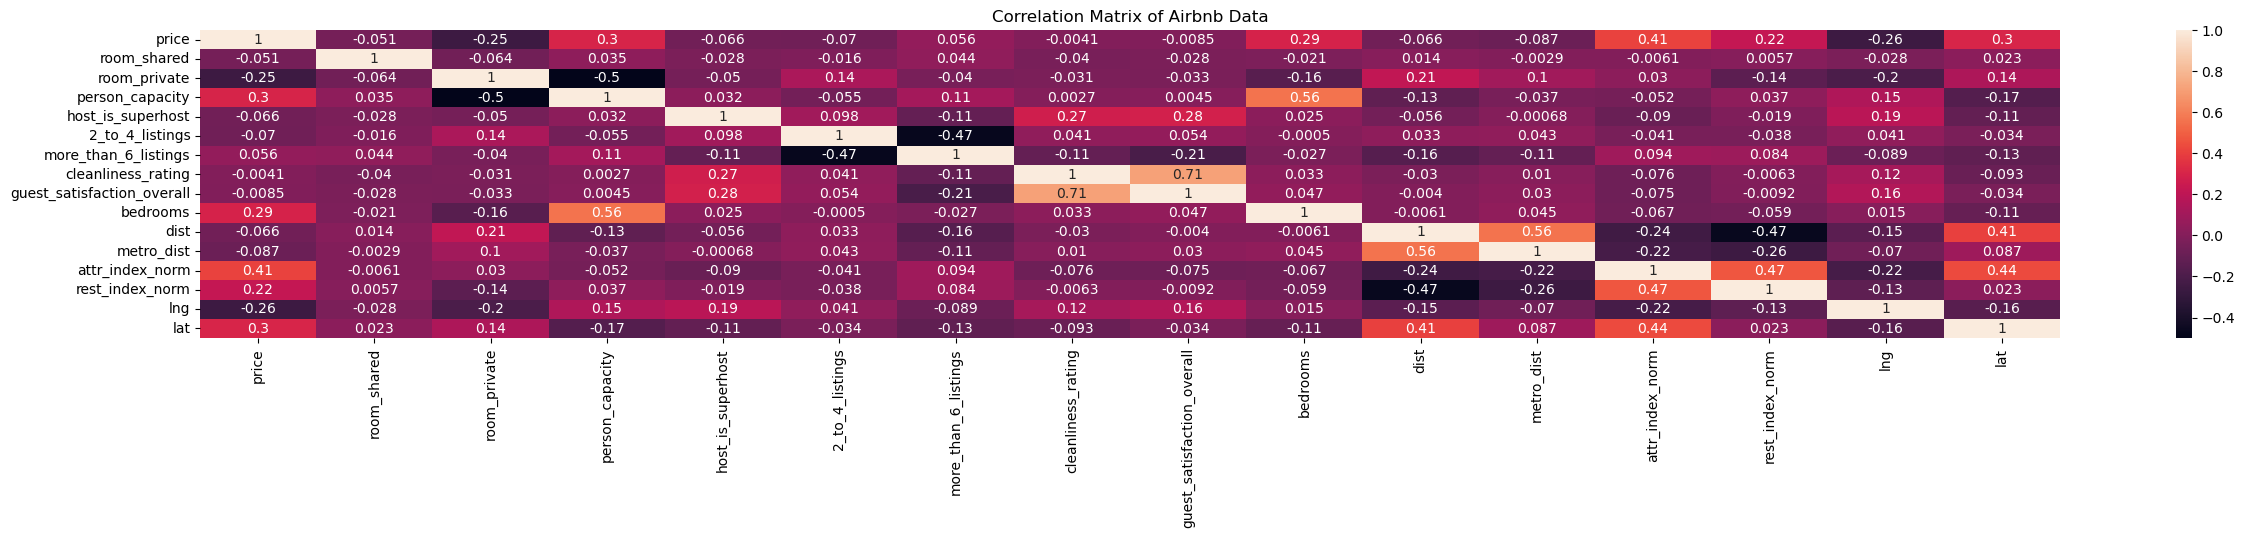

In [49]:
plt.figure(figsize=(30,4))
plt.title('Correlation Matrix of Airbnb Data')

#correlation matrix/heatmap
corr_matrix = airbnb_data_cleaned.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

Text(0, 0.5, 'Airbnb Price')

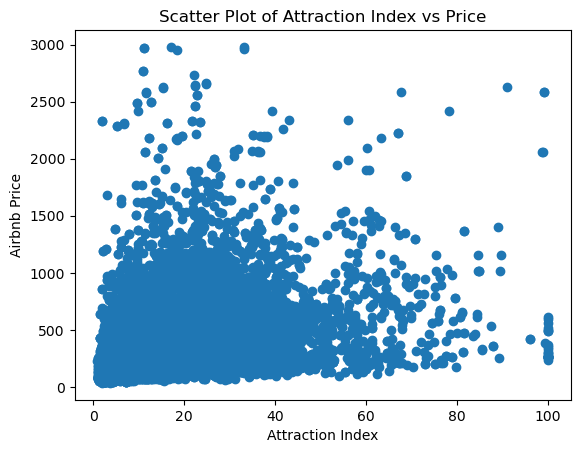

In [53]:
#scatter plots of price
plt.scatter('attr_index_norm', 'price', data = airbnb_data_cleaned)
plt.title('Scatter Plot of Attraction Index vs Price')
plt.xlabel('Attraction Index')
plt.ylabel('Airbnb Price')

Text(0, 0.5, 'Airbnb Price')

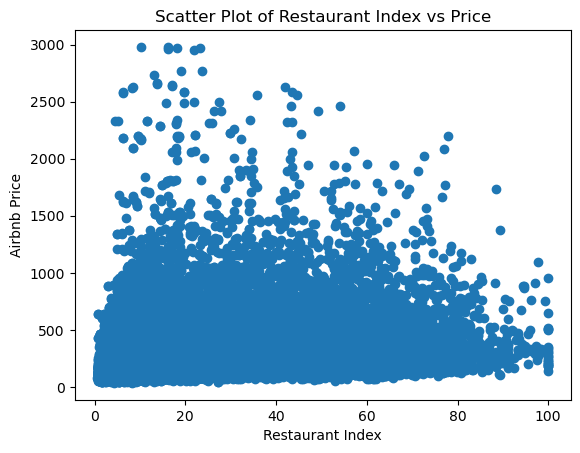

In [52]:
plt.scatter('rest_index_norm', 'price', data = airbnb_data_cleaned)
plt.title('Scatter Plot of Restaurant Index vs Price')
plt.xlabel('Restaurant Index')
plt.ylabel('Airbnb Price')

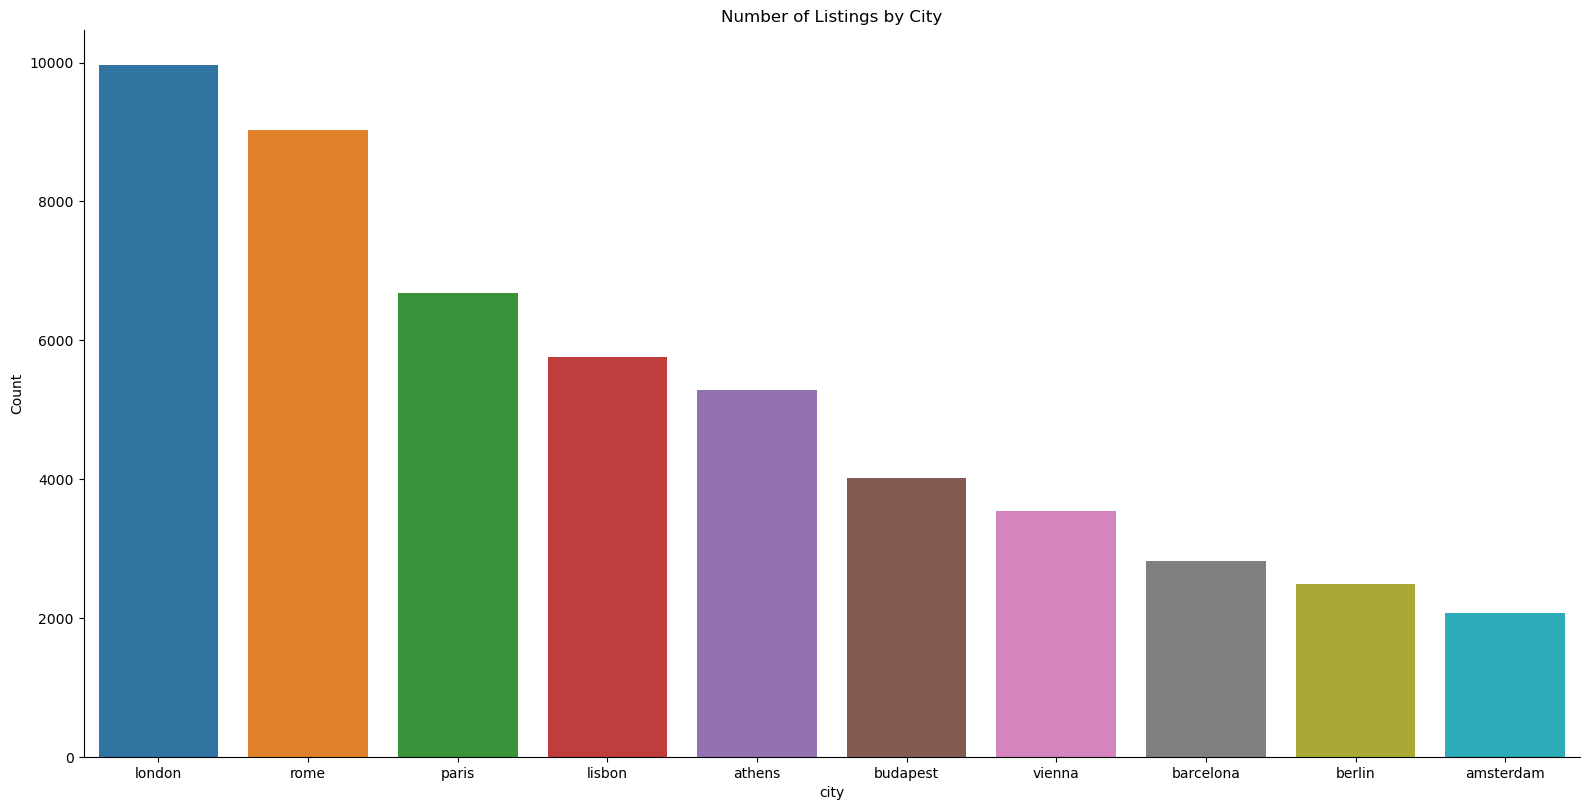

In [75]:
#bar chart of number of listings per city
sns.catplot(x = 'city', y = 'Count', data = counts,
            height = 8, aspect = 2, kind = 'bar')
plt.title('Number of Listings by City')
plt.show()